In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Pranjal Dubey\Downloads\archive.zip")
print(df.info())
print(df.head())

print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     509 non-null    object 
 1   DrCr     509 non-null    object 
 2   amount   509 non-null    float64
 3   balance  509 non-null    float64
 4   mode     509 non-null    object 
 5   name     370 non-null    object 
 6   Day      509 non-null    int64  
 7   Month    509 non-null    int64  
 8   Year     509 non-null    int64  
 9   Tday     509 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 39.9+ KB
None
         date DrCr   amount    balance mode      name  Day  Month  Year  Tday
0  2022-01-01   Db  10000.0  473292.87  ATM       NaN    1      1  2022     1
1  2022-01-01   Db  10000.0  463292.87  ATM       NaN    1      1  2022     1
2  2022-01-02   Db    930.0  462362.87  UPI  AYUBRAJE    2      1  2022     2
3  2022-01-07   Db   2000.0  460362.87  UPI  ABUTALAH    7 

In [29]:
#Data Cleaning
df["date"] = pd.to_datetime(df["date"])

df["name"] = df["name"].fillna("Unknown")

df.rename(columns={"DrCr": "Transaction Type"}, inplace=True)

df["Transaction Type"] = df["Transaction Type"].replace({"Db": "Debit", "Cr": "Credit"})
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              509 non-null    datetime64[ns]
 1   Transaction Type  509 non-null    object        
 2   amount            509 non-null    float64       
 3   balance           509 non-null    float64       
 4   mode              509 non-null    object        
 5   name              509 non-null    object        
 6   Day               509 non-null    int64         
 7   Month             509 non-null    int64         
 8   Year              509 non-null    int64         
 9   Tday              509 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 39.9+ KB
None
        date Transaction Type   amount    balance mode      name  Day  Month  \
0 2022-01-01            Debit  10000.0  473292.87  ATM   Unknown    1      1   


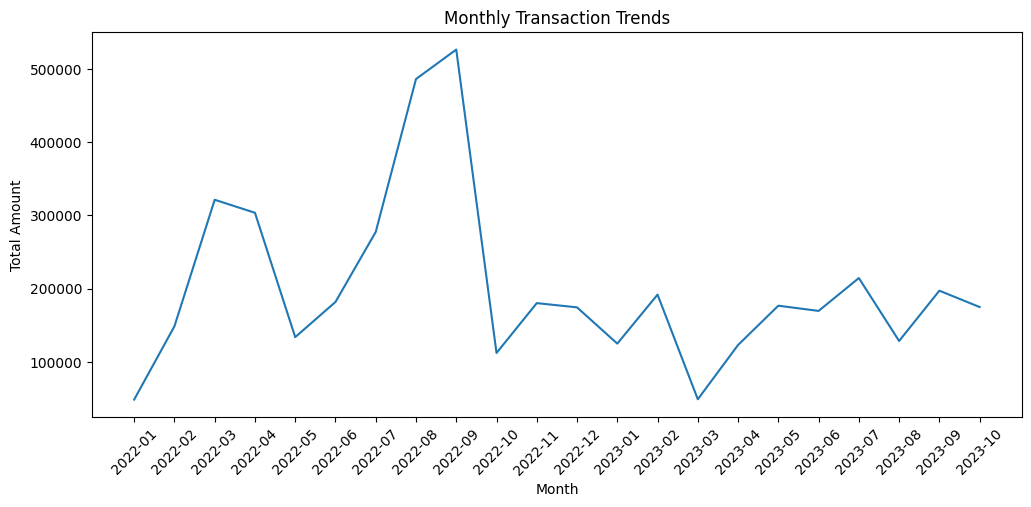

In [26]:
#Data Exploration
df["Year-Month"] = df["date"].dt.to_period("M")
monthly_spending = df.groupby("Year-Month")["amount"].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_spending.index.astype(str), y=monthly_spending.values)
plt.xticks(rotation=45)
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.show()


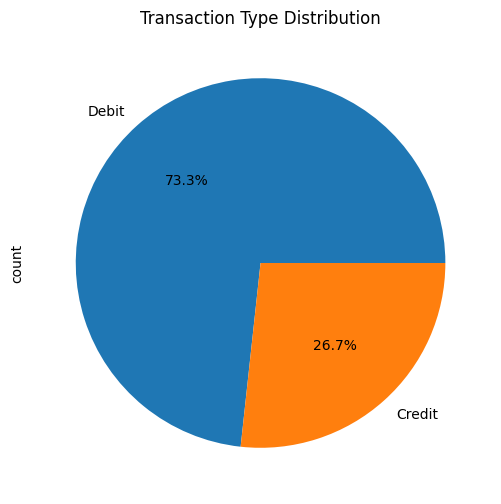

In [16]:
df["Transaction Type"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6, 6), title="Transaction Type Distribution")
plt.show()


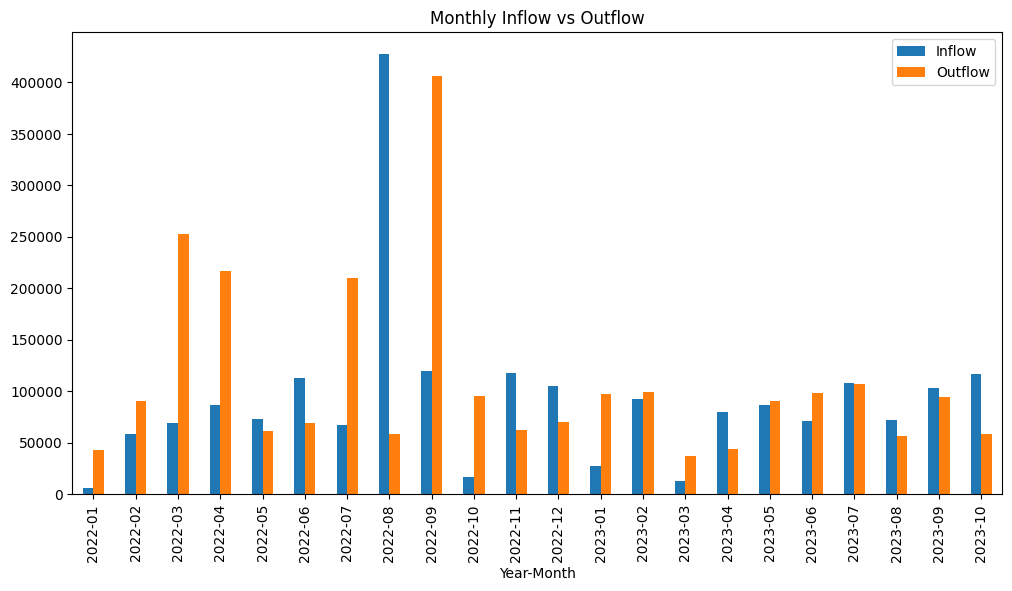

In [17]:
# Financial Health Assessment
df["Inflow"] = df["amount"].where(df["Transaction Type"] == "Credit", 0)
df["Outflow"] = df["amount"].where(df["Transaction Type"] == "Debit", 0)

monthly_finances = df.groupby("Year-Month")[["Inflow", "Outflow"]].sum()

monthly_finances.plot(kind="bar", figsize=(12, 6), title="Monthly Inflow vs Outflow")
plt.show()


In [18]:
high_value_transactions = df[df["amount"] > 50000]
print("High-Value Transactions:\n", high_value_transactions)


High-Value Transactions:
           date Transaction Type    amount    balance                  mode  \
25  2022-02-05           Credit   52521.0  461474.96                  NEFT   
51  2022-03-11           Credit   52601.0  471021.96                  NEFT   
60  2022-03-23            Debit  200000.0  269283.96                CHEQUE   
70  2022-04-11            Debit  200000.0   26153.96                CHEQUE   
75  2022-04-21           Credit   52601.0  107119.96                  NEFT   
85  2022-05-07           Credit   53912.0  160841.96                  NEFT   
102 2022-06-03           Credit   53912.0  176149.05                  NEFT   
125 2022-07-05           Credit   53712.0  191819.14                  NEFT   
138 2022-07-29            Debit  160000.0   11248.14                CHEQUE   
144 2022-08-02           Credit   53912.0   75957.14                  NEFT   
164 2022-08-26           Credit  360000.0  382035.23  FUNDS TRANSFER DEBIT   
166 2022-09-01           Credit   5391

In [20]:
#Anomaly Detection
from scipy.stats import zscore

df["Z-Score"] = abs(zscore(df["amount"]))
anomalies = df[df["Z-Score"] > 3]  
print("Potential Anomalies:\n", anomalies)


Potential Anomalies:
           date Transaction Type    amount    balance                  mode  \
60  2022-03-23            Debit  200000.0  269283.96                CHEQUE   
70  2022-04-11            Debit  200000.0   26153.96                CHEQUE   
138 2022-07-29            Debit  160000.0   11248.14                CHEQUE   
164 2022-08-26           Credit  360000.0  382035.23  FUNDS TRANSFER DEBIT   
172 2022-09-05            Debit  300000.0  111271.23                CHEQUE   

        name  Day  Month  Year  Tday Year-Month    Inflow   Outflow    Z-Score  
60   Unknown   23      3  2022    34    2022-03       0.0  200000.0   7.043558  
70   Unknown   11      4  2022    44    2022-04       0.0  200000.0   7.043558  
138  Unknown   29      7  2022    93    2022-07       0.0  160000.0   5.570500  
164  Unknown   26      8  2022   106    2022-08  360000.0       0.0  12.935791  
172  Unknown    5      9  2022   111    2022-09       0.0  300000.0  10.726204  


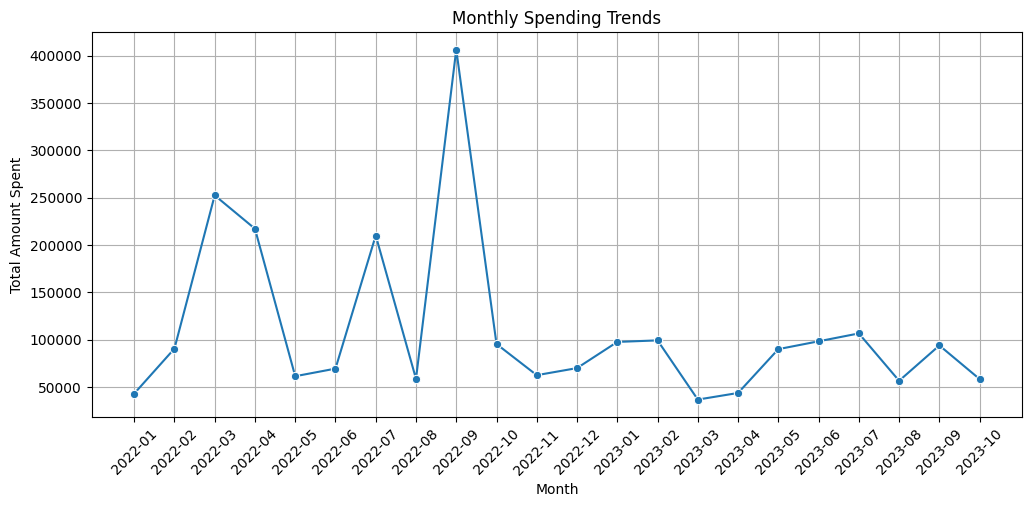

In [25]:
#Time Serries Analysis
df["date"] = pd.to_datetime(df["date"])
df["Year-Month"] = df["date"].dt.to_period("M")
monthly_spending = df[df["Transaction Type"] == "Debit"].groupby("Year-Month")["amount"].sum()
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_spending.index.astype(str), y=monthly_spending.values, marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Spending Trends")
plt.xlabel("Month")
plt.ylabel("Total Amount Spent")
plt.grid(True)
plt.show()

